<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install the Necessary Library

In [1]:
# Installing the reuired library
!pip install prophet

In [55]:
# Data handling and visualization
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# For Facebook Prophet (time series forecasting)
from prophet import Prophet
from prophet.plot import plot_plotly

# Evaluiation
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2: Load and Prepare the Dataset

In [103]:
# Load data
df = yf.download('BTC-USD')

# Display the first few rows of the data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3793 entries, 2014-09-17 to 2025-02-03
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3793 non-null   float64
 1   (High, BTC-USD)    3793 non-null   float64
 2   (Low, BTC-USD)     3793 non-null   float64
 3   (Open, BTC-USD)    3793 non-null   float64
 4   (Volume, BTC-USD)  3793 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.8 KB


Prophet expects a dataframe with two columns:

- ds: The date column (datetime format).
- y: The target variable (values to forecast).

In [105]:
df.reset_index(inplace=True)
df = df[['Date', 'Close']]

In [106]:
df.columns = ['ds', 'y']

In [107]:
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3788,2025-01-30,104735.304688
3789,2025-01-31,102405.023438
3790,2025-02-01,100655.906250
3791,2025-02-02,97688.976562


## 3: Train the Prophet Model

In [108]:
# Initialize the Prophet model
model = Prophet()

In [109]:
# Fit the model to the training data
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x2aspcv/2s34ulvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x2aspcv/prjd7xon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1072', 'data', 'file=/tmp/tmp_x2aspcv/2s34ulvo.json', 'init=/tmp/tmp_x2aspcv/prjd7xon.json', 'output', 'file=/tmp/tmp_x2aspcv/prophet_model3_7nrozh/prophet_model-20250203151137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [110]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [111]:
df.tail()

,ds,y
3788,2025-01-30,104735.304688
3789,2025-01-31,102405.023438
3790,2025-02-01,100655.906250
3791,2025-02-02,97688.976562
3792,2025-02-03,96692.460938


## 5: Make Predictions

In [112]:
# Create a future dataframe for predictions (including test data period)
future_dates = model.make_future_dataframe(periods = 60)

In [113]:
# Generate predictions
future_dates.tail()

,ds
3848,2025-03-31
3849,2025-04-01
3850,2025-04-02
3851,2025-04-03
3852,2025-04-04


In [114]:
prediction = model.predict(future_dates)

In [115]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3848,2025-03-31,97637.846524,90592.452891,104439.738236
3849,2025-04-01,97666.780410,91559.073076,104035.598885
3850,2025-04-02,97814.784432,90998.533462,104671.727612
3851,2025-04-03,97815.208923,90855.890457,104777.861482
3852,2025-04-04,97909.902054,91091.925757,104725.559154


The forecast dataframe includes:

- ds: The date.
- yhat: The predicted value.
- yhat_lower and yhat_upper: The lower and upper bounds of the prediction interval.

## 6:Visualize Predictions

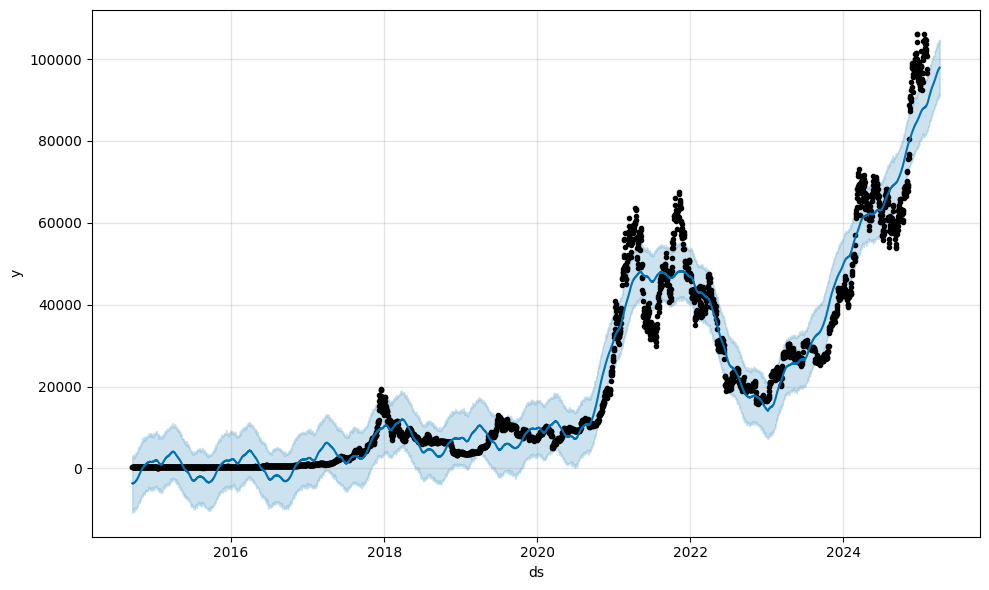

In [117]:
fig = model.plot(prediction)
plt.show()

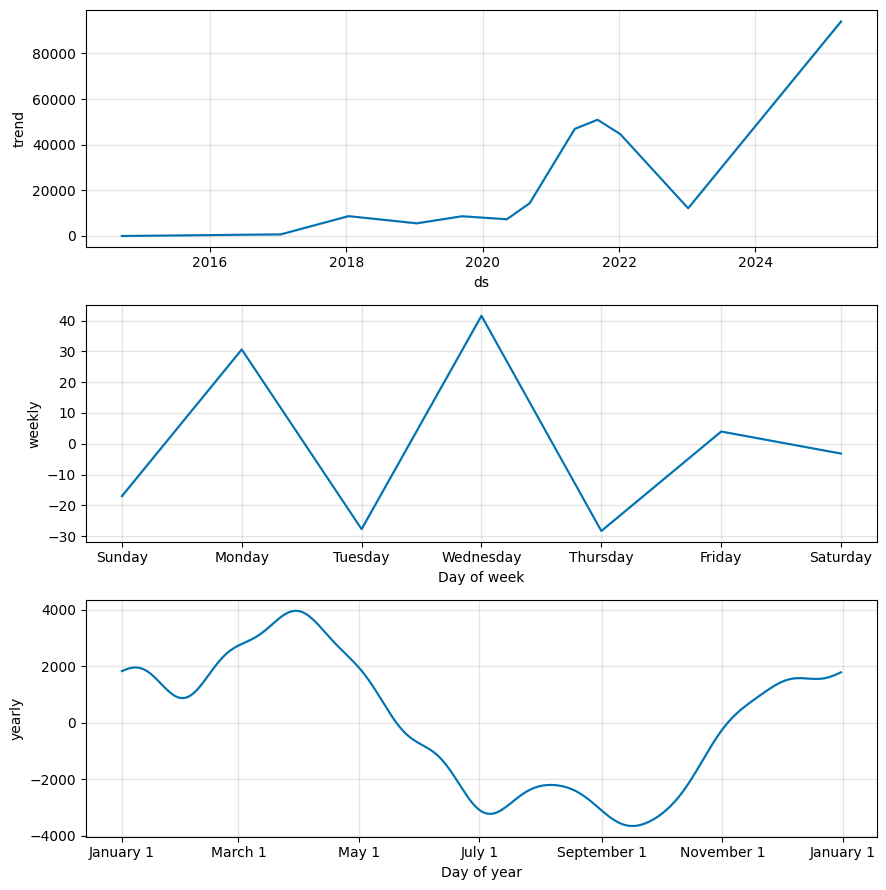

In [118]:
#seasonality
fig_2 = model.plot_components(prediction)
plt.show()

## 7. Diagnostics

In [119]:
df_cv = cross_validation(model, horizon = '60 days')

INFO:prophet:Making 113 forecasts with cutoffs between 2015-09-24 00:00:00 and 2024-12-05 00:00:00


  0%|          | 0/113 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x2aspcv/nsjhatpw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x2aspcv/x6j6w0zh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66031', 'data', 'file=/tmp/tmp_x2aspcv/nsjhatpw.json', 'init=/tmp/tmp_x2aspcv/x6j6w0zh.json', 'output', 'file=/tmp/tmp_x2aspcv/prophet_model5zmgl2w_/prophet_model-20250203152646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x2aspcv/fklntdzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_x2aspcv/ilf45re9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [120]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
6775,2025-01-30,79983.886177,74018.292940,85896.415813,104735.304688,2024-12-05
6776,2025-01-31,80128.463484,74389.254211,86251.431668,102405.023438,2024-12-05
6777,2025-02-01,80309.594496,74208.915165,86021.421347,100655.906250,2024-12-05
6778,2025-02-02,80511.442182,74412.748725,86372.297089,97688.976562,2024-12-05
6779,2025-02-03,80776.082139,75182.992215,86603.771021,96692.460938,2024-12-05


In [121]:
df_performance = performance_metrics(df_cv)

In [122]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1.007875e+08,10039.295512,6519.255970,0.268291,0.231564,0.271507,0.287611
1,7 days,1.028312e+08,10140.570737,6611.458258,0.271829,0.235024,0.276085,0.281711
2,8 days,1.050450e+08,10249.148610,6711.331238,0.275875,0.243116,0.281082,0.277286
3,9 days,1.059130e+08,10291.402932,6752.303932,0.277995,0.247039,0.284328,0.275811
4,10 days,1.084525e+08,10414.053006,6835.414742,0.281104,0.250278,0.288340,0.269912
5,11 days,1.115585e+08,10562.123907,6930.048626,0.285488,0.254768,0.293100,0.264012
6,12 days,1.145635e+08,10703.435007,7023.549463,0.290365,0.255756,0.298254,0.256637
7,13 days,1.174135e+08,10835.752055,7102.491002,0.294966,0.258697,0.303046,0.250737
8,14 days,1.207997e+08,10990.893452,7193.797483,0.299790,0.265922,0.308044,0.250737
9,15 days,1.253857e+08,11197.574637,7322.111208,0.306511,0.270379,0.314675,0.241888
